# Customer Churn Prediction using Machine Learning

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Importing Dataset

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Preprocessing

In [3]:
data = pd.read_csv('Churn_Modelling.csv')
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Convert categorical variables to numerical using label encoding
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Split the data into features (X) and target (y)
X = data.drop('Exited', axis=1)
y = data['Exited']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

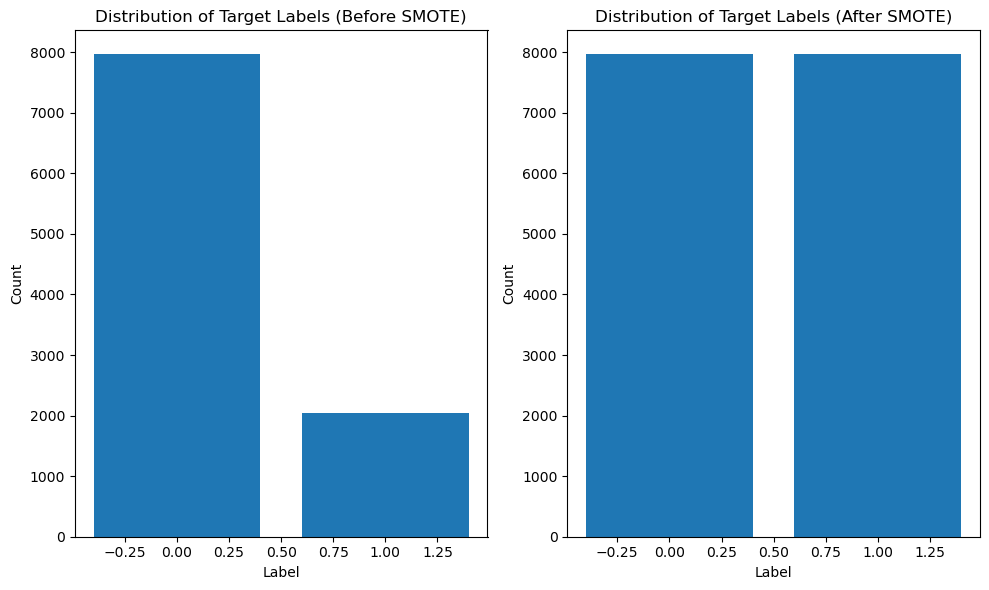

In [4]:
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Split the data 
X = data.drop('Exited', axis=1)
y = data['Exited']

class_counts_before = y.value_counts()

# Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
class_counts_after = pd.Series(y_resampled).value_counts()

# Plot the distribution of target labels before and after SMOTE
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(class_counts_before.index, class_counts_before.values)
plt.title('Distribution of Target Labels (Before SMOTE)')
plt.xlabel('Label')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.bar(class_counts_after.index, class_counts_after.values)
plt.title('Distribution of Target Labels (After SMOTE)')
plt.xlabel('Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Applying Gradient Boosting Model

In [5]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
best_gb_model = GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=300)
best_gb_model.fit(X_train, y_train)

# Make predictions on the test set
gb_preds = best_gb_model.predict(X_test)


print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_preds))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_preds))

Gradient Boosting Accuracy: 0.8675455116133082
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1633
           1       0.85      0.88      0.87      1553

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



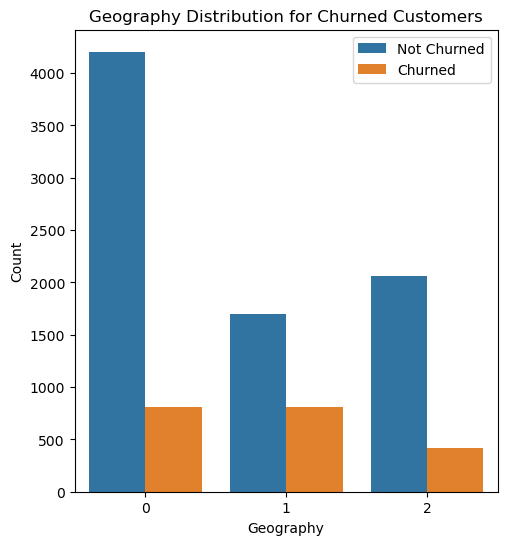

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the distribution of Geography and Gender for churned customers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Geography', hue='Exited', data=data)
plt.title('Geography Distribution for Churned Customers')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(['Not Churned', 'Churned'])

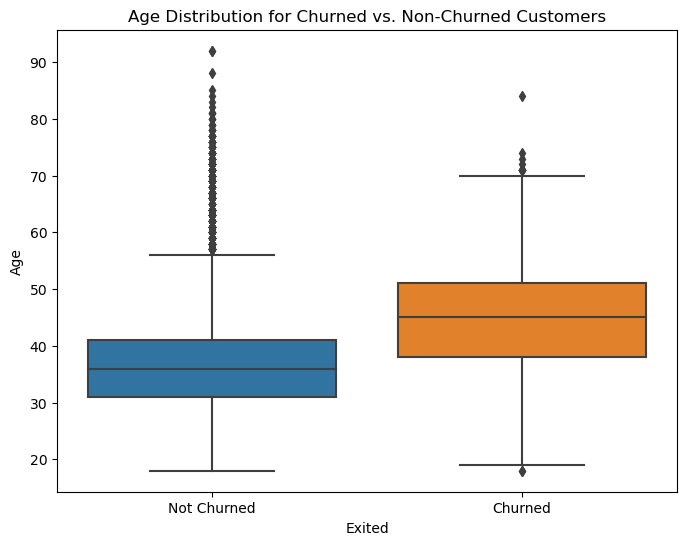

In [7]:
# Visualize the distribution of Age for churned and non-churned customers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='Age', data=data)
plt.title('Age Distribution for Churned vs. Non-Churned Customers')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

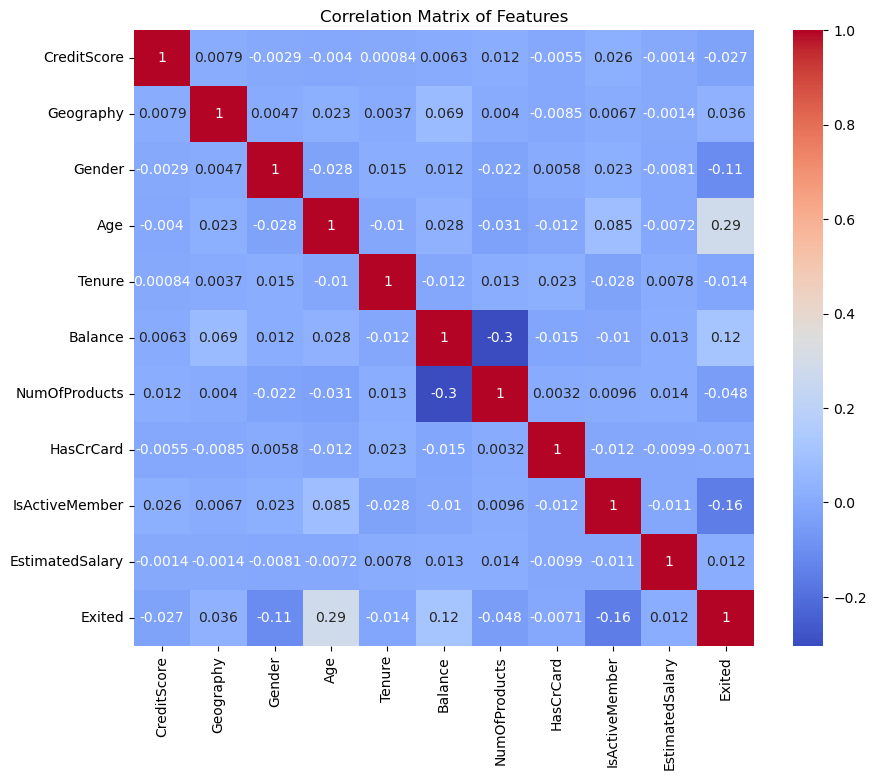

In [8]:
# Visualize the correlation matrix of features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()